# Data Scientist Challenge #

## Problem 1 ##

The problem asks for the possible number of possible combinations of A, B and C balls that sum up to a number N, taking into account the orders in which the balls were drawnSo what the problem is really asking for is all possible **permutations**. We shall call $P$ to the set of all permutations summing up to N. Hereinafter, for a Permutation $P_i$, with $0< i\le M, i \in \mathbb N$, where M ins the number of permutations, we will use $a_i$, $b_i$, and $c_i$ for the number of A, B and C balls drawn in such combination respectively, regardless the order they appeared. Thus, for a Permutation $C_i$, we will have that:

- $2a_i + 3b_i + 4c_i = N$ 

- $0< a \le N/2, a \in \mathbb N$

- $0< b \le N/3, b \in \mathbb N$

- $0< a \le N/4, c \in \mathbb N$

We shall call $C$ the set of all possible combinations s.t.  $C = \sum_{j=1}^K C_j,  j \in \mathbb N$.  The combination $C_j$, with $1< i\le K$ where K is the number of possible **Combinations**, is a subset of P where all permutations $P_i$ belonging to it share strictly the same values for a,b and c, which will be branded as $a_j$, $b_j$, and $c_j$. The number of permutations contained in each of this subsets $C_j$ will be called $n_j$, s.t. $\sum_{j=1}^K C_j*n_j = K$.

Having established the ground concepts and relationships of the problem, the goal will be first to find all K possible Combinations and their composition, $a_j$, $b_j$, and $c_j$. Once all of this is known, for each combination, the number of possible permutations out of their elements n_j will be computed. Summing this result across all combinations will yield the final result M, the number of all possible permutations.





### 1.1 Calculating combinations ###

There are two clear divisions: even numbers and odd numbers. Odd numbers need a 3 to be reached whereas even don't. These two classes can be subdivided into two other: those numbers who need a 2 to be reached, and those who don't. In the case of odd numbers, those whose remainder after dividing by 4 is 1, will need a two. In the case of even numbers, that same remainder will be zero. So, we have 4 types of numbers with the following restrictions.

- Odd, remainder equal 1. Will need at least a 2 and a 3. $a,b \ge 1$

- Odd, remainder equal 3. Will need at least a 3. $b \ge 1$

- Even, remainder equal 2. Will need at least a 2 or two 3s. $a \ge 1$

- Even, divisible by 4. No restrictions.

As it can be seen, only the remainder can tell us the restrictions of combinations. Once restrictions of every number are determined, we will ``rethink´´ it as a number divisible by 4, plus its restrictions. For example, the number 53, with remainder 1, can be thought of all combinations that form 48, plus an A ball and a B ball. The number 48 now can be combined without restrictions, so the process can be automatized for each and everynumber.

At this point, the number of combinations could be ``bruteforced´´ by forming K = $(N/4)*(N/3)$ = $\frac{N^2}{24}$ solutions-those are the possible values for a and c, which leave a determined-, which at 6 flops per solution (2a*+3*b+4*c = N contains 3 multiplications, 2 sums and one comparison- would yield an algorithm of $O(N^2/2)$, which is not great but could be acceptable if the other half of the problem had already been solved, which has not.

In order to improve this, let's start by iterating across c, picking a value. After this, it is known that b must be lower or equal than (N-4c)/3, and that it must be an even number. So, for b only (N-4c)/6 values would be roughly available. a then would be trivial Putting this mathematically:

K = $\sum_{c=0}^{N/4} c*b(c)= \sum_{c=0}^{N/4}\frac{N}{4}*\frac{N-4c}{6} = \frac{1}{6}*\frac{N^2}{8}-\frac{N}{24} $. Considering the term of order $O(n)$ negligible and assuming again 6 flops per computed solution we get an algorithm of $O(N^2/8)$, around 4 times faster







In [6]:
import numpy as np

In [7]:
def combs_mult4(N,plus_a,plus_b):
    sols = []
    for c in range(int(N/4)+1):
            for b in range(0,int(np.floor((N-4*c)/3))+1,2):
                a = int((N-4*c-3*b)/2)
                sol = (a+plus_a,b+plus_b,c)
                if (4*c+3*b+2*a) == N:
                    sols.append(sol)
    if N == 0:
        sols = [(plus_a,plus_b,0)]
    return sols

In [8]:
def find_combs(N):
    plus_b = 0
    plus_a = 0
    
    if N%4 == 2:
        sols = []
        for item in [(1,0),(0,2)]:
            N_new= N-2*item[0]-3*item[1]
            plus_a = item[0]
            plus_b = item[1]
            sols_prov = combs_mult4(N_new,plus_a,plus_b)
            sols = sols + sols_prov

    else:
        if N%4 == 3:
            N_new = N -3
            plus_b = 1
            sols = combs_mult4(N_new,plus_a,plus_b)

        elif N%4 == 1:
            N_new = N-5
            plus_a = 1
            plus_b = 1
            sols = combs_mult4(N_new,plus_a,plus_b)
        else:
            sols = combs_mult4(N,plus_a,plus_b)

        
    
    return sols

Once we have the combinations, it is time to tackle the permutation process. Out of a list of B elements, where B = a+b+c, there can be obtained B! possible combinations. To give a better sense of how big factorial numbers are, we can use Stirling's approximation as $B! \approx \sqrt{2\pi B}(\frac{B}{e})^B  $. Given that the number of combinations $M\alpha N^2$, $N/2 \ge B\ge N/4$ and for each permutations are needed N operations to add elements, our algorithm is really expensive, of the order of $O(\lambda N^3(N/3)^{N/3})$. Finding the combinations next to this step is negligible in terms of computational cost. Using a concrete example, finding the permutations of N = 20 would be around 35 times slower than doing so for N = 15

There are a lot of libraries that compute the permutations out of a list, but I wrote the function for personal amusement-I had never used a function that calls itself-. Once a permutation is computed, it is only added to the list of results if it has not been added before, since our algorithm may recreate the same permutation several times, as it sees all elements as diferent even though we only have 3 balls. Thus, there is still room for improvement.

In [10]:
import matplotlib.pyplo
def plot_complexity(N)

SyntaxError: expected ':' (2315398728.py, line 2)

In [12]:

def find_perms(items):
    if len(items) == 0:
        return [] 
    if len(items) == 1:
        return [items]
    perm = []
    for i in range(len(items)):
        val = items[i]
        items_left = items[:i]+items[i+1:]
        for p in find_perms(items_left):
            perm.append([val] +p)
    return perm

In [13]:
def get_all_perms(N):
    perms = []
    combs = find_combs(N)
    for comb in combs:
        items = comb[0]*'A'+comb[1]*'B'+comb[2]*'C'
        for perm in find_perms(list(items)):
            if perm not in perms:
                perms.append(perm)
    print(f'The total number of permutations is {len(perms)}')
    return perms

In [14]:
get_all_perms(15)

The total number of permutations is 112


[['A', 'A', 'A', 'A', 'A', 'A', 'B'],
 ['A', 'A', 'A', 'A', 'A', 'B', 'A'],
 ['A', 'A', 'A', 'A', 'B', 'A', 'A'],
 ['A', 'A', 'A', 'B', 'A', 'A', 'A'],
 ['A', 'A', 'B', 'A', 'A', 'A', 'A'],
 ['A', 'B', 'A', 'A', 'A', 'A', 'A'],
 ['B', 'A', 'A', 'A', 'A', 'A', 'A'],
 ['A', 'A', 'A', 'B', 'B', 'B'],
 ['A', 'A', 'B', 'A', 'B', 'B'],
 ['A', 'A', 'B', 'B', 'A', 'B'],
 ['A', 'A', 'B', 'B', 'B', 'A'],
 ['A', 'B', 'A', 'A', 'B', 'B'],
 ['A', 'B', 'A', 'B', 'A', 'B'],
 ['A', 'B', 'A', 'B', 'B', 'A'],
 ['A', 'B', 'B', 'A', 'A', 'B'],
 ['A', 'B', 'B', 'A', 'B', 'A'],
 ['A', 'B', 'B', 'B', 'A', 'A'],
 ['B', 'A', 'A', 'A', 'B', 'B'],
 ['B', 'A', 'A', 'B', 'A', 'B'],
 ['B', 'A', 'A', 'B', 'B', 'A'],
 ['B', 'A', 'B', 'A', 'A', 'B'],
 ['B', 'A', 'B', 'A', 'B', 'A'],
 ['B', 'A', 'B', 'B', 'A', 'A'],
 ['B', 'B', 'A', 'A', 'A', 'B'],
 ['B', 'B', 'A', 'A', 'B', 'A'],
 ['B', 'B', 'A', 'B', 'A', 'A'],
 ['B', 'B', 'B', 'A', 'A', 'A'],
 ['B', 'B', 'B', 'B', 'B'],
 ['A', 'A', 'A', 'A', 'B', 'C'],
 ['A', 'A', '

## 1.2. Demand estimation ## 

Let's start by loading and exploring the .csv files with the sales information


In [15]:
import pandas as pd
r1c1 =  pd.read_csv('region1_company1.csv',delimiter = ',')
r1c2 = pd.read_csv('region1_company2.csv',delimiter = ',')
r2c1 = pd.read_csv('region2_company1.csv',delimiter = ',')
r2c2 = pd.read_csv('region1_company1.csv',delimiter = ',')


In [16]:
import numpy as np
r1c1.head()
np.corrcoef(r1c1['Sales_U'], r1c1['Sales_USD'])

array([[1.        , 0.96005297],
       [0.96005297, 1.        ]])

In [17]:
r2c1

,Sales_U,Sales_USD,Date
0,0,0,JAN0591.1
1,0,0,JAN1291.1
2,0,0,JAN1991.1
3,0,0,JAN2691.1
4,0,0,FEB0291.1
...,...,...,...
99,26307,22230,NOV2892.1
100,5405,6355,DEC0592.1
101,4574,5370,DEC1292.1
102,22139,16494,DEC1992.1


The date format is not very attractive for plotting purposes. That's why it would be interesting to convert it to datetime

In [18]:

import datetime

def transform_date(x):
    month = x[:3].lower().capitalize()
    day = x[3:5]
    year = x[5:7]
    return datetime.datetime.strptime(month+day+year,'%b%d%y').date()

In [19]:
#Let's add a new column including the price per unit of product, i.e., per pound
#Also, let's update the date column to convert it to date format
for df in [r1c1,r1c2, r2c1, r2c2]:
    df['Price'] = df['Sales_USD']/df['Sales_U']
    df['Date'] = df['Date'].apply(transform_date)
    

let's create a super data frame containing all data

In [20]:
super_df = pd.DataFrame()
super_df['Date'] = r1c1['Date']
dict_df = {'r1c1':r1c1,'r1c2':r1c2, 'r2c1':r2c1, 'r2c2':r2c2}
for key,value in dict_df.items():
    super_df[f'{key}_Sales_U'] = value['Sales_U']
    super_df[f'{key}_Sales_USD'] = value['Sales_USD']
    super_df[f'{key}_Prices'] = value['Price']

In [75]:
super_df.fillna(0)

,Date,r1c1_Sales_U,r1c1_Sales_USD,r1c1_Prices,r1c2_Sales_U,r1c2_Sales_USD,r1c2_Prices,r2c1_Sales_U,r2c1_Sales_USD,r2c1_Prices,r2c2_Sales_U,r2c2_Sales_USD,r2c2_Prices
0,1991-01-05,124885,129350,1.035753,302306,316739,1.047743,0,0,0.000000,124885,129350,1.035753
1,1991-01-12,105285,107408,1.020164,287260,296130,1.030878,0,0,0.000000,105285,107408,1.020164
2,1991-01-19,138363,136313,0.985184,307435,316440,1.029291,0,0,0.000000,138363,136313,0.985184
3,1991-01-26,111494,113805,1.020728,294160,309993,1.053824,0,0,0.000000,111494,113805,1.020728
4,1991-02-02,110686,113761,1.027781,300197,311884,1.038931,0,0,0.000000,110686,113761,1.027781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1992-11-28,292666,271505,0.927696,424955,473366,1.113920,26307,22230,0.845022,292666,271505,0.927696
100,1992-12-05,132475,146864,1.108617,358501,389666,1.086931,5405,6355,1.175763,132475,146864,1.108617
101,1992-12-12,181175,185060,1.021443,325466,359743,1.105317,4574,5370,1.174027,181175,185060,1.021443
102,1992-12-19,201451,201088,0.998198,352813,395923,1.122189,22139,16494,0.745020,201451,201088,0.998198


In [22]:
r2c1_new = r2c1[r2c1['Price']>0]

Text(0, 0.5, 'Prices')

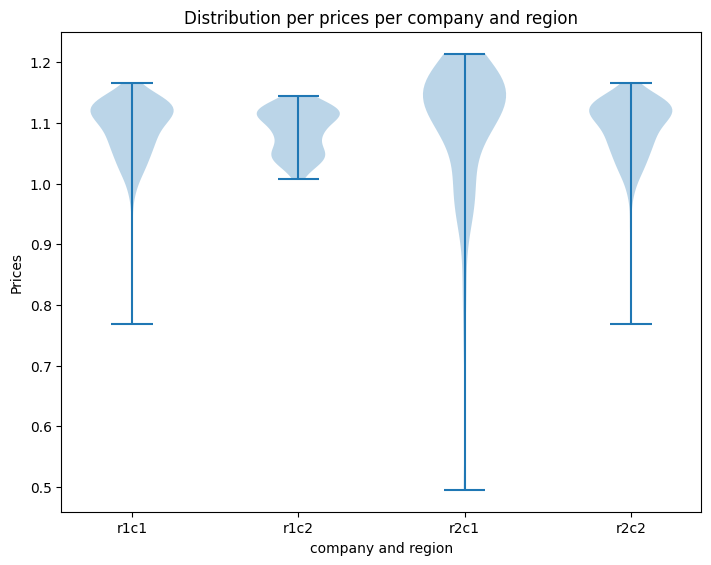

In [23]:
import matplotlib.pyplot as plt
prices_list = []
for df in [r1c1,r1c2, r2c1_new, r2c2]:
    prices = df['Price'].to_list()  
    prices_list.append(prices)
 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(prices_list)
ax.set_xticks([i for i in range(1,5,1)])
ax.set_xticklabels(['r1c1','r1c2', 'r2c1', 'r2c2'])
plt.title(f'Distribution per prices per company and region')
plt.xlabel('company and region')
plt.ylabel('Prices')

In [24]:
super_df.describe()

,r1c1_Sales_U,r1c1_Sales_USD,r1c1_Prices,r1c2_Sales_U,r1c2_Sales_USD,r1c2_Prices,r2c1_Sales_U,r2c1_Sales_USD,r2c1_Prices,r2c2_Sales_U,r2c2_Sales_USD,r2c2_Prices
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,88.000000,104.000000,104.000000,104.000000
mean,153267.740385,165575.240385,1.088719,352545.384615,382102.403846,1.086778,9340.403846,9074.115385,1.094971,153267.740385,165575.240385,1.088719
std,44522.175454,40426.814070,0.054266,76286.284723,78753.166683,0.036779,14460.317075,8549.961014,0.111722,44522.175454,40426.814070,0.054266
min,104327.000000,107408.000000,0.768942,234448.000000,267132.000000,1.008224,0.000000,0.000000,0.494999,104327.000000,107408.000000,0.768942
25%,122906.500000,135443.250000,1.061713,298108.500000,315845.000000,1.053772,4999.750000,5813.500000,1.070636,122906.500000,135443.250000,1.061713
50%,139879.000000,153660.000000,1.106540,342103.000000,372825.000000,1.092727,6404.500000,7442.000000,1.127675,139879.000000,153660.000000,1.106540
75%,168125.750000,186190.250000,1.126358,392705.250000,435013.000000,1.116062,9814.500000,10788.250000,1.165281,168125.750000,186190.250000,1.126358
max,398276.000000,306251.000000,1.166239,643756.000000,687153.000000,1.143827,137463.000000,68044.000000,1.214205,398276.000000,306251.000000,1.166239


Now let's take a look at our transformed dataframes

In [25]:
r1c1.head()

,Sales_U,Sales_USD,Date,Price
0,124885,129350,1991-01-05,1.035753
1,105285,107408,1991-01-12,1.020164
2,138363,136313,1991-01-19,0.985184
3,111494,113805,1991-01-26,1.020728
4,110686,113761,1991-02-02,1.027781


In [59]:
#Exluding cols
useful_cols = [col for col in super_df.columns][1:]
array_data = np.array(super_df[useful_cols])
means = np.mean(array_data,0)
stds = np.std(array_data,0)
array_data = array_data - np.repeat(np.array([means]), len(super_df), 0); 
array_data = np.divide(array_data, np.repeat(np.array([stds]), len(super_df), 0)); 



In [63]:
array_data

array([[-0.64058388, -0.90040898, -0.98076814, ..., -0.64058388,
        -0.90040898, -0.98076814],
       [-1.08294582, -1.44579594, -1.26942298, ..., -1.08294582,
        -1.44579594, -1.26942298],
       [-0.33639234, -0.72733773, -1.91715794, ..., -0.33639234,
        -0.72733773, -1.91715794],
       ...,
       [ 0.62985252,  0.48431017, -1.2457389 , ...,  0.62985252,
         0.48431017, -1.2457389 ],
       [ 1.08747143,  0.88269967, -1.67617354, ...,  1.08747143,
         0.88269967, -1.67617354],
       [ 2.48377786,  2.71216446, -0.84303389, ...,  2.48377786,
         2.71216446, -0.84303389]])

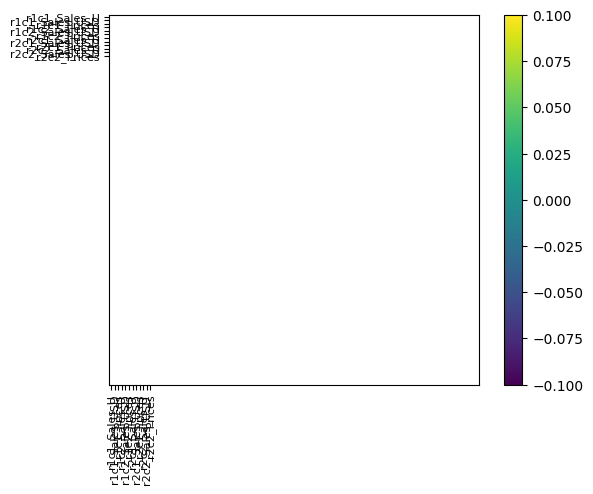

In [62]:
allStatisticsCov = np.cov(array_data)
plt.figure(); 
plt.imshow(allStatisticsCov); 
x = np.arange(len(useful_cols))
plt.xticks(x, useful_cols,fontsize = 8,rotation = 90)
plt.yticks(x, useful_cols,fontsize = 8)
plt.colorbar();

In [26]:
import plotly.express as px
def plot_time_series(df,cols_plot):
    fig = px.line(df, x='Date',y=cols_plot,
                title=f'Time series of {cols_plot}')
    fig.update_xaxes(dtick = "M1")
    fig.show()

### Tasks ###

Construct time-series plots of sales and prices for Company 1 in Region 1 and
2. Repeat the exercise for Company 2. Describe the differences or similarities
between Company 1 and 2 pricing policies.


In [27]:
super_df.columns.to_list()

['Date',
 'r1c1_Sales_U',
 'r1c1_Sales_USD',
 'r1c1_Prices',
 'r1c2_Sales_U',
 'r1c2_Sales_USD',
 'r1c2_Prices',
 'r2c1_Sales_U',
 'r2c1_Sales_USD',
 'r2c1_Prices',
 'r2c2_Sales_U',
 'r2c2_Sales_USD',
 'r2c2_Prices']

Now, let's plot the data. Let's begin with data from company one

In [46]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, subplot_titles=("Sales(lbs)","Prices(USD/lb)"))

fig.add_trace(
    go.Scatter(x=super_df['Date'], y=super_df['r1c1_Sales_U'],mode='lines',
                    name='r1c1'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=super_df['Date'], y=super_df['r2c1_Sales_U'],mode='lines',
                    name='r2c1'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=super_df['Date'], y=super_df['r1c1_Prices'], mode='lines',
                    name='r1c1'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=super_df['Date'], y=super_df['r2c1_Prices'], mode='lines',
                    name='r2c1'),
    row=2, col=1
)

fig.update_layout(height=700, width=1200, title_text="Sales and Prices for Company 1 in both regions")
fig.show()


Sales in region 2 look much more steady, although it needs to be pointed out that those sales are negligible are compared to Region 1's. Only in September sales in region 2 exceed 30k lbs, and they do so reaching the 100k mark. On the other hand, sales in region 1 never drop below 100k and even reach 400k. Despite the differences in amounts sold, there appears to some correlation in the data. When sales in region 1 spike, so do sales in region 2. Let's see how strong is this correlation through Pearson's corr. coefficient

In [47]:
#Note that first 17 weeks are avoided since no sales took place in week 2
np.corrcoef(super_df['r1c1_Sales_U'].to_list()[17:],super_df['r2c1_Sales_U'].to_list()[17:])

array([[1.        , 0.72771559],
       [0.72771559, 1.        ]])

Which is over 0.7, a decent value. Prices allow for a better comparison definetely. Prices in region 1 look much more steady, probably beacause the volatility of the market is much smaller in relative terms. Again, there is some correlation between the data. Skipping the first 17 weeks of the year where there were no sales in region 2: 

In [ ]:
np.corrcoef(super_df['r1c1_Prices'].to_list()[17:],super_df['r2c1_Prices'].to_list()[17:])

array([[1.        , 0.74221324],
       [0.74221324, 1.        ]])

Gives again a strong correlation in both markets. This probably means that the product is very global or that both regions are geographically close or share some socioeconomic similarities. It is also interesting to note that sharp increases in demand lead to pronounced fall in price, pointing to the elasticity of the market. When supply rises and demand does not, the price drops

In [48]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, subplot_titles=("Sales(lbs)","Prices(USD/lb)"))

fig.add_trace(
    go.Scatter(x=super_df['Date'], y=super_df['r1c2_Sales_U'],mode='lines',
                    name='r1c2'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=super_df['Date'], y=super_df['r2c2_Sales_U'],mode='lines',
                    name='r2c2'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=super_df['Date'], y=super_df['r1c2_Prices'], mode='lines',
                    name='r1c2'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=super_df['Date'], y=super_df['r2c2_Prices'], mode='lines',
                    name='r2c2'),
    row=2, col=1
)

fig.update_layout(height=700, width=1200, title_text="Sales and Prices for Company 2 in both regions")
fig.show()

Again, when assessing total sales in both regions, region 2 presents lower total number of sales, but the difference is not so drastic now. There seems to be some correlation which is 

In [66]:
np.corrcoef(super_df['r1c2_Sales_U'].to_list(),super_df['r2c2_Sales_U'].to_list())

array([[1.        , 0.52463759],
       [0.52463759, 1.        ]])

0.52, which hints moderate to low correlation. It also seems to be that seasonality of both sales is slightly unphased, following similar trends but a week or two later. Prices in both regions are  similar and seemingly more correlated, with the execption of those sharp valleys in the end



In [68]:
np.corrcoef(super_df['r1c2_Prices'].to_list(),super_df['r2c2_Prices'].to_list())

array([[1.       , 0.3868128],
       [0.3868128, 1.       ]])

Corr. coef. of 0.38 is a low value certainly, although that latest trend in the data by the end of 1992 might have biased our results. Taking away the last 17 weeks of the year yields

In [69]:
np.corrcoef(super_df['r1c2_Prices'].to_list()[:87],super_df['r2c2_Prices'].to_list()[:87])

array([[1.        , 0.65653377],
       [0.65653377, 1.        ]])

yields 0.65, which is not too high but provides some clarity. Considering the relationship between sales and prices, it is worth to notice the elasticity of the demand, with sudden increases in sales when the price drops, as it was seen in company 1

***Construct scatter-plots of sales versus prices for Company 1 in Region 1 and
Region 2 separately. Repeat the exercise for Company 2. Is there evidence for
a negatively sloped demand-curve in the data? Eye-balling these plots, does
demand appear more elastic in Region 1 or 2?***

In [82]:
super_df = super_df.fillna(0)


In [81]:
super_df['r2c1_Prices'].fillna(0)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
99     0.845022
100    1.175763
101    1.174027
102    0.745020
103    0.942142
Name: r2c1_Prices, Length: 104, dtype: float64

In [95]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

fig = make_subplots(rows=2, cols=1, subplot_titles=("Region 1","Region 2"))

fig.add_trace(
    go.Scatter(x=super_df['r1c1_Sales_U'], y=super_df['r1c1_Prices'],mode='markers',
                    name='r1c1'),
    row=1, col=1
)

model = LinearRegression()
x = np.array(super_df['r1c1_Sales_U']).reshape((-1,1))
y = np.array(super_df['r1c1_Prices'])
model.fit(x,y)
r_sq = model.score(x,y)
y_pred = x*model.coef_ + model.intercept_
y_pred = [float(el) for el in y_pred]
x = [float(el) for el in x]
fig.add_trace(
    go.Scatter(x=x, y=y_pred ,mode='lines',
                    name='r1c1'),
    row=1, col=1
)




fig.add_trace(
    go.Scatter(x=super_df['r2c1_Sales_U'].to_list()[17:], y=super_df['r2c1_Prices'].to_list()[17:], mode='markers',
                    name='r2c1'),
    row=2, col=1
)

model = LinearRegression()
x = np.array(super_df['r2c1_Sales_U'].to_list()[17:]).reshape((-1,1))
y = np.array(super_df['r2c1_Prices'].to_list()[17:])
model.fit(x,y)
r_sq = model.score(x,y)
y_pred = x*model.coef_ + model.intercept_
y_pred = [float(el) for el in y_pred]
x = [float(el) for el in x]
fig.add_trace(
    go.Scatter(x=x, y=y_pred ,mode='lines',
                    name='r2c1'),
    row=2, col=1
)

fig.update_layout(height=700, width=1200, title_text="Sales vs. Prices for Company 1 in both regions")
fig.show()
print(y_pred)

[1.12999865499553, 1.0784781689947123, 1.101409077631312, 1.1034766681279418, 1.1135425692299554, 1.1273627793916394, 1.1220063899763935, 1.1329186731530512, 1.0923044247426434, 1.0669310992620717, 1.1051996602084666, 1.1126417768790846, 1.1236749717806913, 1.1239167952305895, 1.1248840890301826, 1.0467992970580442, 1.0923286070876332, 1.1287230362973169, 1.1297507859593843, 1.126867041319348, 1.1184878587803744, 1.049991366596701, 1.105217796967209, 1.1256518784836094, 1.126734038421904, 1.1253072800675044, 1.1092078838905297, 1.1175387017395237, 1.1360140133117484, 1.0732366457181681, 1.0633581577898255, 1.1320239263884277, 1.1304823018953265, 1.0404272491532258, 1.082558939711745, 1.1010523880427119, 1.1166681373198901, 1.1264922149720058, 1.0965061071846252, 1.1139959881985146, 1.1322597042520786, 1.1369087600763719, 1.1264015311782938, 1.0625420036464188, 1.0931387156447925, 1.1126357312928372, 1.118258126502971, 1.1351797224095996, 1.1316793279723227, 1.0812168195648098, 1.095478

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

fig = make_subplots(rows=2, cols=1, subplot_titles=("Region 1","Region 2"))

fig.add_trace(
    go.Scatter(x=super_df['r1c2_Sales_U'], y=super_df['r1c2_Prices'],mode='markers',
                    name='r1c2'),
    row=1, col=1
)

model = LinearRegression()
x = np.array(super_df['r1c2_Sales_U']).reshape((-1,1))
y = np.array(super_df['r1c2_Prices'])
model.fit(x,y)
r_sq = model.score(x,y)
y_pred = x*model.coef_ + model.intercept_
y_pred = [float(el) for el in y_pred]
x = [float(el) for el in x]
fig.add_trace(
    go.Scatter(x=x, y=y_pred ,mode='lines',
                    name='r1c2'),
    row=1, col=1
)




fig.add_trace(
    go.Scatter(x=super_df['r2c2_Sales_U'].to_list()[17:], y=super_df['r2c2_Prices'].to_list()[17:], mode='markers',
                    name='r2c2'),
    row=2, col=1
)

model = LinearRegression()
x = np.array(super_df['r2c2_Sales_U'].to_list()[17:]).reshape((-1,1))
y = np.array(super_df['r2c2_Prices'].to_list()[17:])
model.fit(x,y)
r_sq = model.score(x,y)
y_pred = x*model.coef_ + model.intercept_
y_pred = [float(el) for el in y_pred]
x = [float(el) for el in x]
fig.add_trace(
    go.Scatter(x=x, y=y_pred ,mode='lines',
                    name='r2c2'),
    row=2, col=1
)

fig.update_layout(height=700, width=1200, title_text="Sales vs. Prices for Company 2 in both regions")
fig.update_xaxes(title_text="Sales(lbs)", row=1, col=1)
fig.update_xaxes(title_text="Sales(lbs)", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Prices(USD/lb)", row=1, col=1)
fig.update_yaxes(title_text="Prices(USD/lb)", row=2, col=1)
fig.show()
print(y_pred)